<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-26/blob/main/Simple%20linear%20regression(Deliverytime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
path = r"/content/delivery_time.csv"
dataset = pd.read_csv(path)
dataset.rename(columns={'Delivery Time': 'DeliveryTime', 'Sorting Time': 'SortingTime'}, inplace=True)

In [3]:
X = dataset[['SortingTime']]
y = dataset['DeliveryTime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model_1 = smf.ols('DeliveryTime ~ SortingTime', data=dataset).fit()
model_2 = smf.ols('DeliveryTime ~ np.log(SortingTime)', data=dataset).fit()
model_3 = smf.ols('DeliveryTime ~ np.sqrt(SortingTime)', data=dataset).fit()
model_4 = smf.ols('DeliveryTime ~ np.exp(SortingTime)', data=dataset).fit()

In [5]:
print("Model 1 (No transformation):")
print(model_1.summary())
print("\nModel 2 (Log transformation):")
print(model_2.summary())
print("\nModel 3 (Square root transformation):")
print(model_3.summary())
print("\nModel 4 (Exponential transformation):")
print(model_4.summary())

Model 1 (No transformation):
                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        05:33:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.582

In [8]:
best_model = model_1
best_model_name = "Model 1 (No transformation)"
if model_2.rsquared > best_model.rsquared:
    best_model = model_2
    best_model_name = "Model 2 (Log transformation)"
if model_3.rsquared > best_model.rsquared:
    best_model = model_3
    best_model_name = "Model 3 (Square root transformation)"
if model_4.rsquared > best_model.rsquared:
    best_model = model_4
    best_model_name = "Model 4 (Exponential transformation)"

In [6]:
predictions = model_3.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("\nBest Model:", best_model_name)
print("Mean Absolute Error (Test):", mae)
print("Mean Squared Error (Test):", mse)
print("R-squared (Test):", r2)


Best Model: Model 3 (Square root transformation)
Mean Absolute Error (Test): 1.6596906059906549
Mean Squared Error (Test): 5.3739838793658325
R-squared (Test): 0.2269001741039507


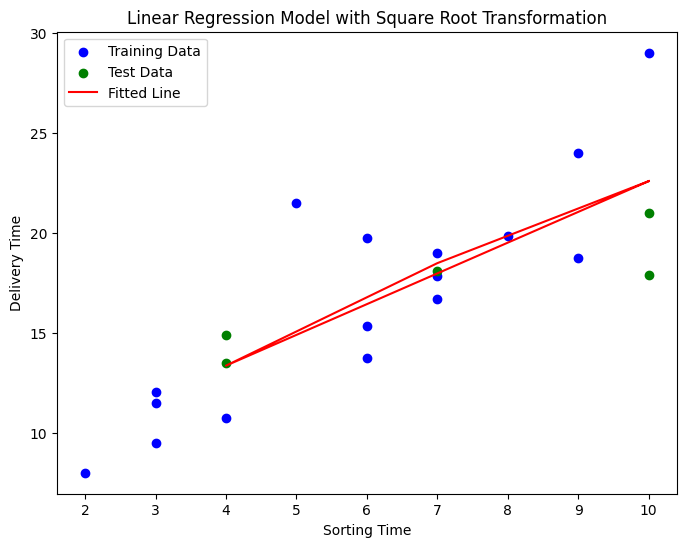

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, predictions, color='red', label='Fitted Line')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Linear Regression Model with Square Root Transformation')
plt.legend()
plt.show()

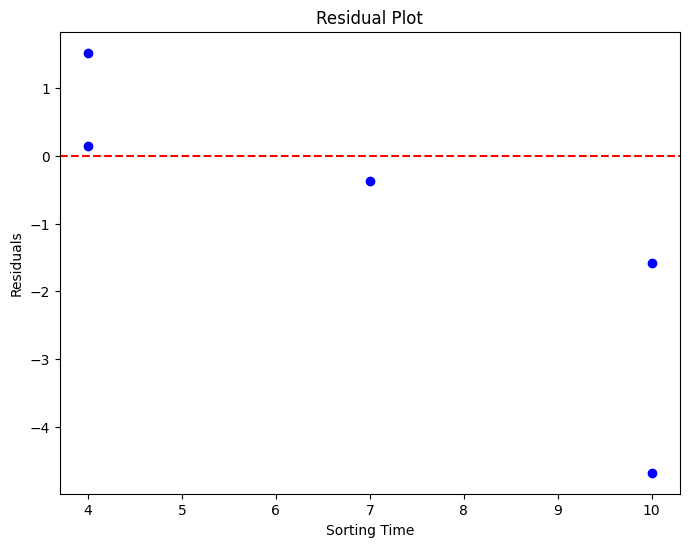

In [11]:
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Sorting Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

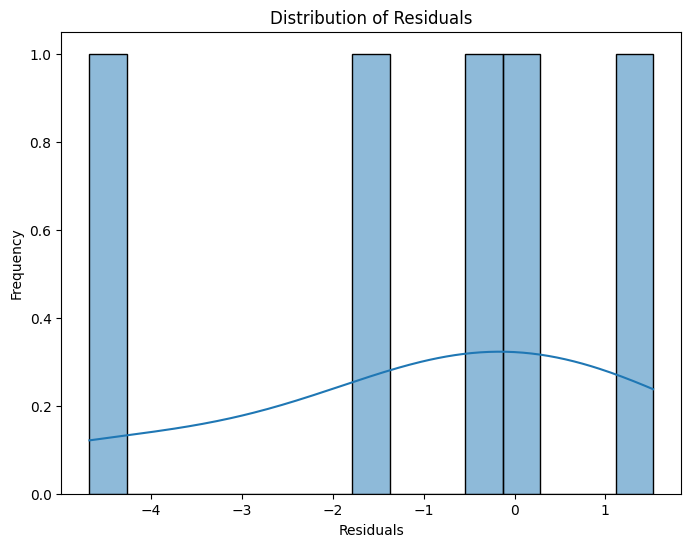

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=15, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

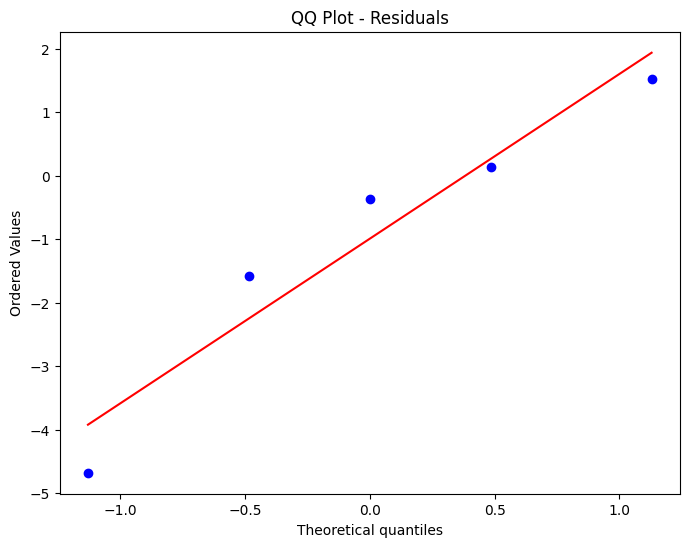

In [13]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('QQ Plot - Residuals')
plt.show()